# FASHION MNIST (Regularization)

In [85]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [86]:
# Initialize the random number generator
import random
random.seed(5)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

<b>Fashion MNIST dataset</b>

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

Label and Description<br><br>
0	T-shirt/top<br>
1	Trouser<br>
2	Pullover<br>
3	Dress<br>
4	Coat<br>
5	Sandal<br>
6	Shirt<br>
7	Sneaker<br>
8	Bag<br>
9	Ankle boot<br>

In [87]:
# Loading the datasets
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [88]:
# Checking the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Since there is no channel, indicating that this is a single channel problem

Hence we do not convert into RGB to Grayscale

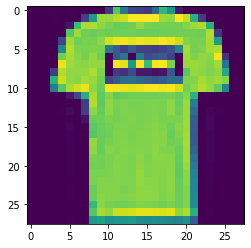

In [89]:
plt.imshow(X_train[1])

In [90]:
y_train[1]

0

### Data Pre-Processing

In [91]:
# Reshaping the Image

X_train1 = X_train.reshape(60000,28*28)
X_test1 = X_test.reshape(10000,28*28)
print(X_train1.shape)
print(X_test1.shape)

(60000, 784)
(10000, 784)


In [92]:
# Normalizing the Image

X_train2 = X_train1/255.
X_test2 = X_test1/255.

### One-Hot Encoding the Class Vector

In [93]:
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

y_train shape (60000,)
y_test shape (10000,)


In [94]:
# Converting a class labels vector (Integer) to Binary class Matrix

from tensorflow.keras.utils import to_categorical

y_train1 = to_categorical(y_train,num_classes=10)
y_test1 = to_categorical(y_test,num_classes=10)

In [95]:
print(y_train[1])
y_train1[1]
# hence using to_categorical we can fetch the binary classified output of 0 - [1,0,0,0,0,0,0,0,0,0]

0


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### # Model Building

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers,optimizers

In [97]:
# hyperparamaters

def train_and_test_loop(iterations, lr, Lambda):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
        
    model = Sequential()
    ### Write your code here
    model.add(Dense(units=128,activation='relu',input_shape=(784,)))
    model.add(Dense(units=64,activation='relu'))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=10,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    # Regularization
    sgd = optimizers.SGD(lr=learning_rate)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train2, y_train1, epochs=iterations, batch_size=1000, verbose= 0)
    
    # Model Evaluation
    score = model.evaluate(X_test2,y_test1)
    
    return score

In [98]:
lr = 0.001
Lambda = 0
train_and_test_loop(100, lr, Lambda)

313/313 [==============================] - 2s 3ms/step - loss: 0.7107 - accuracy: 0.7538


[0.7107227444648743, 0.7537999749183655]

In [99]:
# Summary of the Model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Predicting the Model

In [100]:
model.predict(X_test2[1].reshape(1,-1)).round()
# round (): is to predict the Probability to 0 and 1
# reshape (1,-1) : to make input shape same as that of Training Shape

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

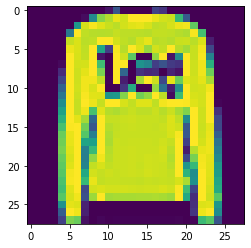

In [101]:
plt.imshow(X_test[1])

In [102]:
y_test[1]

2

From the above Analysis, we can see that X_test shows an Image of a Pullover and y_test indicates the Label number for Pullover as 2

# Run Coarse

In [104]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(50, lr, Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

313/313 [==============================] - 1s 1ms/step - loss: 2.3226 - accuracy: 0.0730
Try 1/10: Best_val_acc: [2.3225865364074707, 0.0729999989271164], lr: 7.575884954938135e-06, Lambda: 0.00023145091023371383

313/313 [==============================] - 1s 2ms/step - loss: 2.2107 - accuracy: 0.2478
Try 2/10: Best_val_acc: [2.210728168487549, 0.24779999256134033], lr: 5.755081476312067e-05, Lambda: 6.132886145765596e-07

313/313 [==============================] - 1s 2ms/step - loss: 1.4904 - accuracy: 0.5817
Try 3/10: Best_val_acc: [1.4904009103775024, 0.5817000269889832], lr: 0.0005284724051545576, Lambda: 0.004173242059761579

313/313 [==============================] - 1s 1ms/step - loss: 2.3313 - accuracy: 0.0742
Try 4/10: Best_val_acc: [2.331256866455078, 0.07419999688863754], lr: 1.7300416272787675e-06, Lambda: 0.004775465910309454

313/313 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.8222
Try 5/10: Best_val_acc: [0.508249044418335, 0.8222000002861

In [ ]:
# ****************************************************************************************************** #